In [5]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import call
from datetime import datetime
import pandas as pd
import os
import json
import glob
import lightgbm as lgb
import _pickle as cPickle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [16]:
all_cols = ['luma_avg', 'luma_change_ratio', 'kld_hist_2frames', 'vertical_black_values',
            'horizontal_black_values', 'crU_change_ratio', 'crV_change_ratio', 'crU_avg',
            'crV_avg', 'AvgB', 'AvgG', 'AvgR', 'KLD_histB', 'KLD_histG', 'KLD_histR', 'Time']
cols = ['luma_avg', 'kld_hist_2frames', 'horizontal_black_values', 'crU_change_ratio', 'AvgG', 'kld_hist_pattern', 'Label']
save_metrics = 'metrics/'
with_labels = 'data/labelled_data/'
train = with_labels+'train/'
test = with_labels+'test/'
configs = 'data/configs/'
annotations = {}
name = 'sky_v1'
thresh = 0.5

In [10]:
def compute_metrics(path):
    all_vids = glob.glob(path+'*.mp4')
    print('Available assets in folder:', all_vids)
    
    for vidpath in all_vids:
        vidname = os.path.split(vidpath)[-1].split(".")[0]
        cmd1 = "ffmpeg -hide_banner -threads 4 -i " + '%s' % vidpath + " -vf videometrics=config_file=utils/videometrics.cfg -f null -"
        cmd2 = 'paste -d"," luma_avg.dat kld_hist_2frames.dat horizontal_black_values.dat crU_change_ratio.dat avgG.dat kld_hist_pattern.dat time.dat > ./metrics/%s.csv' % vidname
        cmd3 = 'rm -rf *.dat'

        t1 = datetime.now()
        call(cmd1, shell=True)
        t2 = datetime.now()
        call(cmd2, shell=True)
        clean(vidname)
        call(cmd3, shell=True)
        
        add_labels(vidname)
        
        print('Preprocessing done for %s' %vidname)
        print('Time taken for metrics computation = %s' %str(t2-t1))           

In [26]:
def clean(csvname):
    metrics_df = pd.read_csv(save_metrics+csvname+'.csv', names=cols)
    metrics_df = metrics_df.dropna()
    metrics_df.to_csv(save_metrics+csvname+'.csv', header=True, index=False)
    print('Cleaning done for %s' % csvname)
    return metrics_df

# Problems in annotations: (resolved)


<details><summary>Iteration 1</summary>
<p>
Problematic:
 19: 34_1252_1576400400_1576404000 -> {"trans":[31520,56042,56045,108401,108404,111092,111094,],
"ads":[3152136494,56046,58996,82219,87014,108405,111090,]}

Problematic:
 24: 34_134388_1576654200_1576656000 -> {"trans":[25751,25752,50999,51000,],
"ads":[25753,31299,51001,55799,]}

Problematic:
 32: 34_149619_1576425600_1576429200 -> {"trans":[2104,2105,27351,27354,52045,52047,52946,52948,79247,79248,81773,,81775,105274,105275,110062,110065],
"ads":[0,2405,27355,30808,52048,56543,79249,84649,105276,110375]}

Problematic:
 34: 34_159691_1576404000_1576411200 -> {"trans":[3093,3098,72096,72101,74345,74350,96229,96231,120461,121362,125245,125250,145941,145943,148633,148638,163703,163709,165953,165958,186387,186393,188637,188643],
"ads":[847,3092,25403,27916,72102,74343,96232,98930,121363,125244,145944,148632,163710,165952,186394,188636]

Problematic:
 39: 34_163831_1576440000_1576441800 -> {"trans":[685,686,29970,29977,37171,37178],
"ads":[0,684,29978,37170,]}

Problematic:
 40: 34_163831_1576441800_1576443600 -> {"trans":[ 10698,10700,29545,42340,42343],
"ads":[10700,14142,29545,33437, 42344, 44885,]}

Problematic:
 42: 34_174689_1576429200_1576432800 -> {"trans":[2075,2077,43606,43610,63715,63718,68052,80717,80719,104997,104999,],
"ads":[0,2074,43611,46750,63719,68207,80720,85662,105000, 110659]}

Problematic:
 43: 34_174689_1576515600_1576519200 -> {"trans":[66775,66777,88259,88261,99557,99560,107938,107940,111840. 111858],
"ads":[ 66778, 70375,88262,93060,99561,103121,107941,111839]}

Problematic:
 48: 34_174998_1576544400_1576546200 -> {"trans":[3672,3689,8478, 8485,26876, 26878,56210,56212,],
"ads":[0,3671,8026,8477,26879,32245, 56213,59635]}

Problematic:
 50: 34_1842_1576584000_1576586700 -> {"trans":[32402,32409,64761,64763,],
"ads":[32410,36003,61614,64760]}

Problematic:
 51: 34_1842_1576609200_1576612800 -> {"trans":[2907,2909,6056,26729, 26732,43110,43112,67567,67570, 84760,84763],
"ads"[0,2906,6057,7706, 26733,32126,43113,50162,67570,72970,84764,90613]}

Problematic:
 63: 34_206185_1576546200_1576548000 -> {"trans":[2207,2209,26721,26723,52462,52465,54796,54798,54831,54964,57864,57882],
"ads"[2210,8806,26724,33461,52466,57865]}

Problematic:
 68: 34_225819_1576375200_1576377000 -> nan

Problematic:
 72: 34_229339_1576373400_1576375200 -> nan

Problematic:
 83: 34_256694_1576450800_1576454400 -> {"trans":[3010,3028,25370,25371,51099,51102,106519,106521,113419,113615],
"ads":[25372,32088,51103,58148,106522,]}
</p>
</details>

<details><summary>Iteration 2</summary>
<p>

Error is Expecting ':' delimiter: line 2 column 6 (char 82)
Problematic:
 51: 34_1842_1576609200_1576612800 -> {"trans":[2907,2909,6056,26729, 26732,43110,43112,67567,67570, 84760,84763],
"ads"[0,2906,6057,7706, 26733,32126,43113,50162,67570,72970,84764,90613]}

Error is Expecting ':' delimiter: line 2 column 6 (char 87)
Problematic:
 63: 34_206185_1576546200_1576548000 -> {"trans":[2207,2209,26721,26723,52462,52465,54796,54798,54831,54964,57864,57882],
"ads"[2210,8806,26724,33461,52466,57865]}

Error is the JSON object must be str, bytes or bytearray, not 'float'
Problematic:
 68: 34_225819_1576375200_1576377000 -> nan

Error is the JSON object must be str, bytes or bytearray, not 'float'
Problematic:
 72: 34_229339_1576373400_1576375200 -> nan
</p>
</details>

In [3]:
# Code to clean the jsons and collect all the annotation jsons

import json
import pandas as pd

df = pd.read_csv('data/Annotation sheet - Sheet1.csv', usecols=['Asset Name', 'Annotation JSON'])
df = df.dropna() # Empty columns dropped

names = df['Asset Name']
configs = df['Annotation JSON']
names, configs = names[1:], configs[1:] # First value removed


names = [i.split('/')[0] for i in names]
configs = [json.loads(json.dumps(i)) for i in configs]

# # Logic to check for incorrect jsons
# new_configs = []
# new_names = []
# for index, value in enumerate(configs):
#     try:
#         new_configs.append(json.loads(value))
#         new_names.append(names[index])
#     except Exception as e:
#         print(f'Error is {e}')
#         print(f'Problematic:\n {index+2}: {names[index]} -> {value}\n')

# print(len(names), len(configs))

# Create configs for csvs
# for name, cfg in zip(names,configs):
#     with open(f'data/configs/{name}.cfg','w+') as f:
#         f.write(cfg)

annotations = dict(zip(names, configs))
# ads = json.loads(annotations['34_103534_1576411200_1576413900'])['ads']
# ann_df = pd.DataFrame(annotations, index=[0])

# Redo assets

<details><summary>Redo metrics</summary>
<p>
        
        34_229339_1576373400_1576375200 has empty csv, recompute metrics!
        34_141379_1577246400_1577250000 has empty csv, recompute metrics!

        Error occured : '34_103534_1576377000_1576379700'
        Annotations for 34_103534_1576377000_1576379700 not done! Skipping...

        34_3322_1576506600_1576508400 has empty csv, recompute metrics!
        34_230966_1577237400_1577239200 has empty csv, recompute metrics!
        34_174994_1577203200_1577206800 has empty csv, recompute metrics!
        34_174994_1576771200_1576774800 has empty csv, recompute metrics!
        34_525_1576422000_1576423800 has empty csv, recompute metrics!
        34_586_1576416600_1576418400 has empty csv, recompute metrics!
        34_230946_1576810800_1576814400 has empty csv, recompute metrics!
        merge has empty csv, recompute metrics!
        34_195346_1577073600_1577077200 has empty csv, recompute metrics!
        34_586_1576548000_1576549800 has empty csv, recompute metrics!
        34_195346_1576987200_1576990800 has empty csv, recompute metrics!
        34_141379_1576814400_1576818000 has empty csv, recompute metrics!
        34_266604_1576616400_1576623600 has empty csv, recompute metrics!
        34_586_1576398600_1576400400 has empty csv, recompute metrics!
        34_230946_1577242800_1577246400 has empty csv, recompute metrics!
        34_230946_1576724400_1576728000 has empty csv, recompute metrics!
        34_174994_1576857600_1576861200 has empty csv, recompute metrics!
        34_266604_1576576800_1576584000 has empty csv, recompute metrics!
        34_141379_1576900800_1576904400 has empty csv, recompute metrics!
        34_206185_1577151000_1577152800 has empty csv, recompute metrics!
        34_525_1576594800_1576596600 has empty csv, recompute metrics!
        34_1842_1577127600_1577131200 has empty csv, recompute metrics!
        34_141379_1577160000_1577163600 has empty csv, recompute metrics!
        34_103582_1576803600_1576807200 has empty csv, recompute metrics!
        34_230946_1576897200_1576900800 has empty csv, recompute metrics!
        34_230946_1577156400_1577160000 has empty csv, recompute metrics!
        34_42555_1576627200_1576629000 has empty csv, recompute metrics!
        34_586_1576503000_1576504800 has empty csv, recompute metrics!
        34_3322_1576459800_1576461600 has empty csv, recompute metrics!
        34_141379_1576728000_1576731600 has empty csv, recompute metrics!
        34_42554_1576540800_1576542600 has empty csv, recompute metrics!

        Error occured : '34_586_1576571400_1576573200'
        Annotations for 34_586_1576571400_1576573200 not done! Skipping...

        34_586_1576485000_1576486800 has empty csv, recompute metrics!
        34_525_1576508400_1576510200 has empty csv, recompute metrics!
        34_225819_1576375200_1576377000 has empty csv, recompute metrics!
</p>
</details>

<details><summary> Redo add_labels </summary>
    <p>
    
        Label added for 34_174998_1576544400_1576546200
        34_229339_1576373400_1576375200 has empty csv, recompute metrics!
        Label added for 34_1611_1576510200_1576512000
        Label added for 34_149619_1576425600_1576429200
        Label added for 34_1129_1576652400_1576654200
        Label added for 34_229339_1576542600_1576544400
        Label added for 34_1129_1576379700_1576382400
        Label added for 34_1842_1576584000_1576586700
        Label added for 34_256694_1576393200_1576396800
        Label added for 34_141379_1576623600_1576627200
        Label added for 34_147366_1576612800_1576614600
        Label added for 34_206175_1576454400_1576456200
        34_141379_1577246400_1577250000 has empty csv, recompute metrics!

        Error occured : '34_103534_1576377000_1576379700'
        Annotations for ~~34_103534_1576377000_1576379700~~ not done! Skipping...

        34_3322_1576506600_1576508400 has empty csv, recompute metrics!
        Label added for 34_195346_1576382400_1576386000
        Label added for 34_1129_1576566000_1576567800
        Label added for 34_134388_1576654200_1576656000
        34_230966_1577237400_1577239200 has empty csv, recompute metrics!
        Label added for 34_256694_1576418400_1576422000
        34_174994_1577203200_1577206800 has empty csv, recompute metrics!
        Label added for 34_1129_1576605600_1576608300
        34_174994_1576771200_1576774800 has empty csv, recompute metrics!
        34_525_1576422000_1576423800 has empty csv, recompute metrics!
        Label added for 34_174689_1576602000_1576605600
        Label added for 34_225819_1576461600_1576463400
        Label added for 34_195366_1576490400_1576497600
        Label added for 34_225814_1576458000_1576459800
        34_586_1576416600_1576418400 has empty csv, recompute metrics!

        Error occured : list index out of range
        Annotations for ~~34_256694_1576450800_1576454400~~ not done! Skipping...

        Label added for 34_141379_1576555200_1576558800
        34_230946_1576810800_1576814400 has empty csv, recompute metrics!
        merge has empty csv, recompute metrics!
        Label added for 34_190572_1576630800_1576632600
        Label added for 34_266604_1576558800_1576566000
        Label added for 34_195326_1576569600_1576571400
        Label added for 34_134388_1576567800_1576569600
        Label added for 34_103534_1576435500_1576436400
        34_195346_1577073600_1577077200 has empty csv, recompute metrics!
        Label added for 34_230946_1576551600_1576555200
        Label added for 34_256694_1576479600_1576483200
        34_586_1576548000_1576549800 has empty csv, recompute metrics!
        34_195346_1576987200_1576990800 has empty csv, recompute metrics!
        Label added for 34_103534_1576411200_1576413900
        Label added for 34_149333_1576636200_1576638000
        34_141379_1576814400_1576818000 has empty csv, recompute metrics!
        34_266604_1576616400_1576623600 has empty csv, recompute metrics!
        34_586_1576398600_1576400400 has empty csv, recompute metrics!
        Label added for 34_1611_1576596600_1576598400
        Label added for 34_206185_1576546200_1576548000
        Label added for 34_163831_1576440000_1576441800
        34_230946_1577242800_1577246400 has empty csv, recompute metrics!
        34_230946_1576724400_1576728000 has empty csv, recompute metrics!
        Label added for 34_174689_1576515600_1576519200
        34_174994_1576857600_1576861200 has empty csv, recompute metrics!
        Label added for 34_174998_1576369800_1576371600
        Label added for 34_159691_1576404000_1576411200

        Error occured : list index out of range
        Annotations for ~~34_1252_1576400400_1576404000~~ not done! Skipping...

        Label added for 34_195346_1576468800_1576472400
        34_266604_1576576800_1576584000 has empty csv, recompute metrics!
        34_141379_1576900800_1576904400 has empty csv, recompute metrics!
        Label added for 34_229339_1576438200_1576440000
        Label added for 34_141379_1576641600_1576645200
        Label added for 34_159691_1576386000_1576393200
        Label added for 34_1129_1576500300_1576503000

        Error occured : list index out of range
        Annotations for ~~34_1842_1576522800_1576526400~~ not done! Skipping...

        Label added for 34_1641_1576528200_1576530000
        Label added for 34_230966_1576632600_1576634400
        34_206185_1577151000_1577152800 has empty csv, recompute metrics!
        Label added for 34_586_1576634400_1576636200

        Error occured : list index out of range
        Annotations for ~~34_1252_1576486800_1576490400~~ not done! Skipping...

        34_525_1576594800_1576596600 has empty csv, recompute metrics!
        34_1842_1577127600_1577131200 has empty csv, recompute metrics!
        Label added for 34_240535_1576396800_1576398600
        Label added for 34_230946_1576638000_1576641600
        Label added for 34_229272_1576663200_1576670400
        34_141379_1577160000_1577163600 has empty csv, recompute metrics!
        Label added for 34_1129_1576432800_1576435500
        Label added for 34_174994_1576512000_1576515600
        Label added for 34_210365_1576521900_1576522800
        34_103582_1576803600_1576807200 has empty csv, recompute metrics!
        34_230946_1576897200_1576900800 has empty csv, recompute metrics!
        34_230946_1577156400_1577160000 has empty csv, recompute metrics!
        34_42555_1576627200_1576629000 has empty csv, recompute metrics!
        34_586_1576503000_1576504800 has empty csv, recompute metrics!
        34_3322_1576459800_1576461600 has empty csv, recompute metrics!
        34_141379_1576728000_1576731600 has empty csv, recompute metrics!
        Label added for 34_1129_1576466100_1576468800
        Label added for 34_163831_1576441800_1576443600
        Label added for 34_149333_1576549800_1576551600
        Label added for 34_1611_1576423800_1576425600
        Label added for 34_159691_1576443600_1576450800
        Label added for 34_147366_1576526400_1576528200
        Label added for 34_1842_1576609200_1576612800
        Label added for 34_1252_1576573200_1576576800
        Label added for 34_195366_1576472400_1576479600
        Label added for 34_174691_1576629000_1576630800
        34_42554_1576540800_1576542600 has empty csv, recompute metrics!
        Label added for 34_1129_1576413900_1576416600
        Label added for 34_586_1576657800_1576659600
        Label added for 34_256694_1576537200_1576540800
        Label added for 34_103534_1576463400_1576466100
        Label added for 34_210365_1576608300_1576609200
        Label added for 34_174689_1576429200_1576432800

        Error occured : '34_586_1576571400_1576573200'
        Annotations for ~~34_586_1576571400_1576573200~~ not done! Skipping...

        34_586_1576485000_1576486800 has empty csv, recompute metrics!
        Label added for 34_1129_1576519200_1576521900
        Label added for 34_103582_1576717200_1576720800
        Label added for 34_230946_1576591200_1576594800
        34_525_1576508400_1576510200 has empty csv, recompute metrics!
        34_225819_1576375200_1576377000 has empty csv, recompute metrics!
        Label added for 34_229272_1576645200_1576652400
        Label added for 34_103534_1576436400_1576438200
        Label added for 34_1129_1576586700_1576589400
        Label added for 34_195366_1576530000_1576537200
        Label added for 34_586_1576589400_1576591200
        Label added for 34_195326_1576656000_1576657800
        Label added for 34_1252_1576659600_1576663200
        Label added for 34_103534_1576497600_1576500300
        Label added for 34_240535_1576483200_1576485000
        Label added for 34_206185_1576456200_1576458000
        Label added for 34_206185_1576504800_1576506600
        Label added for 34_225814_1576371600_1576373400

</p>
</details>

In [16]:
def add_labels(csv_df, csvname):

    try:
        
#     cfgname = ""
#     cfgname.join(configs)
#     cfgname.join(csvname)
#     cfgname.join('.cfg')
#     with open(cfgname,'r') as f:
#         data = json.loads(f)
#     ads = data["ads"]

        ads = json.loads((annotations[csvname]))['ads']
        ad_starts, ad_stops = ads[0::2], ads[1::2]
#         print(ad_starts, ad_stops)

        allframes = list(range(len(df.index)))
        labels = []

        for _, val in enumerate(allframes):
            frameLabel = 0
            for i in range(len(ad_starts)):
                if ad_starts[i] <= val <= ad_stops[i]:
                    frameLabel = 1
            labels.append(frameLabel)
        df['Label'] = labels
        df.to_csv(with_labels+csvname+'.csv', index=False, header=True)
        print('Label added for %s' %csvname)

    except Exception as e:
        print(f'\nError occured : {e}')
        print(f'Annotations for ~~{csvname}~~ not done! Skipping...\n')

import glob
import os

all_csvs = glob.glob('../../metrics/*.csv')

for csv in all_csvs:
    name = (os.path.split(csv)[-1]).split('.')[0]
    df = pd.read_csv(csv)
    if len(df.index) == 0:
        print(f'{name} has empty csv, recompute metrics!')
    else:
        add_labels(df, name)
    

In [35]:
def combine():
    
    data = ['data/labelled_data/train/']
#     data = ['data/labelled_data/test/']
    for i in data:
        all_files = glob.glob(i+"*.csv")
        li = []
        for filename in all_files:
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)
        frame = pd.concat(li, axis=0, ignore_index=True)
        frame.to_csv(f'data/train.csv')
        frame.head()
combine()

In [26]:
# Visualization

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# plt.style.use('dark_background')
%matplotlib notebook

cols = ['luma_avg', 'kld_hist_2frames', 'horizontal_black_values', 'crV_avg', 'crU_change_ratio', 'AvgG', 'kld_hist_pattern', 'Label']
df = pd.read_csv(train+'34_586_1576634400_1576636200.csv',usecols=['crV_avg', 'Label'])

pat = df.crV_avg.values
pat = pat.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(pat)

# plt.plot(x_scaled)
# plt.plot(df['Label'])

In [18]:
def train():
    train = pd.read_csv('data/train.csv', usecols=cols)
    # X = train.iloc[:,:-1]
    # y = train.iloc[:,-1]

    X = train.iloc[:,:-1]
    y = train.iloc[:,-1]

    # X_train = MinMaxScaler().fit_transform(X_train)

    # Dimensionality Reduction by using PCA

    # pca = decomposition.PCA(n_components=11)
    # pca.fit(X_train)
    # pc_train = pca.transform(X_train)
    # pca.fit(X_test)
    # pc_test = pca.transform(X_test)

    # print(type(principalComponents))
    # print('\n',principalComponents)

    # del X_train
    # del X_test
    # gc.collect()
    # X_train = pd.DataFrame(data=pc_train)
    # X_test = pd.DataFrame(data=pc_test)
    # print(X_train.head())
    
    balance=list(y)
    pos = balance.count(1)
    neg = balance.count(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True, stratify = y)
    
    lgb_train = lgb.Dataset(X_train, y_train)
    print('LGB Train =',lgb_train,'\n')
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    evals_result = {}

    params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.15 ,
            'verbose': 1,
            'num_leaves': 500,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 400,
            'num_rounds': 1000,
            'metric' : 'auc',
            'nthread': 2,
            # 'scale_pos_weight': neg/pos
            }

    ''' Grid Search param grid:

    'n_estimators':[100,200,400,600,800,1000],

    '''

    t1=datetime.now()
    print('Starting training...')
    gbm = lgb.train(params,
                    lgb_train,
#                     boost_from_average=false,
                    num_boost_round=500,
                    valid_sets=lgb_eval,
                    evals_result=evals_result,
                    verbose_eval=True,
                    early_stopping_rounds=35)

    t2=datetime.now()
    print('\nTraining time =',t2-t1,'\n')

    # Plotting 
    _ = lgb.plot_metric(evals_result)
    plt.savefig('%s_training.png'%name)
    _ = lgb.plot_importance(gbm)
    plt.savefig('%s_featimp.png'%name)
    # _ = lgb.plot_tree(gbm, figsize=(200, 200))

    # # Cross-validate
    # cv_results = lgb.cv(params, lgb_train, num_boost_round=300, nfold=5, 
    #                     verbose_eval=20, early_stopping_rounds=40)

    # print('Current parameters:\n', params)
    # print('\nBest num_boost_round:', len(cv_results['auc-mean']))
    # print('Best CV score:', cv_results['auc-mean'][-1])

    model_json = gbm.dump_model()

    # gbm.save_model('7assets_gbm.txt', num_iteration=gbm.best_iteration)
    # model_json = gbm.dump_model()

    with open('%s.pkl'%name, 'wb') as fout:
        cPickle.dump(gbm, fout)

train()

# Training
<details><summary>version 1 verbose</summary>
<p>
    
        Confusion matrix, without normalization
        [[1527089  115935]
        [ 105678  311349]] 

        Normalized confusion matrix
        [[0.92943804 0.07056196]
        [0.25340805 0.74659195]] 

                       precision    recall  f1-score   support

                   0       0.94      0.93      0.93   1643024
                   1       0.73      0.75      0.74    417027

            accuracy                           0.89   2060051
           macro avg       0.83      0.84      0.83   2060051
        weighted avg       0.89      0.89      0.89   2060051

        AUC = 0.8380149917451992 

        Accuracy = 0.8924235370871886 

        The rmse of prediction is: 0.3279885103365839 
</p>
</details>

In [14]:
def plot(actual,predicted):

    # pred_df = pd.read_csv('/home/abcd/Documents/AdSparx/classifier/scripts/gb/kdoc8preds_7assets.csv')
    # print(pred_df.head())
    # actual=pred_df['Actual Label'].tolist()
    # predicted=pred_df['Predicted Label'].tolist()
    frame_nums = list(range(len(predicted)))
    plt.plot(frame_nums, actual, label='Actual',color='red',linewidth=2.5)
    plt.plot(frame_nums, predicted, label='Predicted',color='blue',alpha=0.5,linewidth=1)
    plt.plot([], [], ' ', label="Thresh = %0.2f"%thresh,marker='*')
    plt.legend(loc='best')
    plt.xlabel("Frames")
    plt.ylabel("Peaks = Ads")
    plt.tight_layout()
    plt.savefig('%s_sqrplot.png'%name)

In [15]:
def eval_metrics(y_test,y_pred,pred_probs):

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # print('\nConfusion Matrix:\n',cm)
    plot_confusion_matrix(y_test, y_pred, name, cm, classes=['Content','Ads'],
                        title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, name, cm, classes=['Content','Ads'], normalize=True,
                          title='Normalized confusion matrix')

    # Classification Report
    print("\n\n",classification_report(y_test, y_pred))

    # Area under ROC curve
    auc_lgbm = roc_auc_score(y_test, y_pred)
    print("AUC =",auc_lgbm,'\n')

    # Plot AUC ROC curve
    fpr,tpr,threshold = metrics.roc_curve(y_test,pred_probs)
    roc_auc = metrics.auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('%s_ROC.png'%name)
    plt.clf()

    # Accuracy
    accuracy_lgbm = accuracy_score(y_test, y_pred)
    print("Accuracy =",accuracy_lgbm,'\n')

    # Root mean square error
    print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5,'\n')

def plot_confusion_matrix(y_true, y_pred, name, cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
        print(cm,'\n')
    else:
        print('\nConfusion matrix, without normalization')
        print(cm,'\n')
    

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    #          rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    if normalize:
        plt.savefig('%s_norm_conf.png'%name)
    else:
        plt.savefig('%s_non-norm_conf.png'%name)
    plt.clf()
    return ax


Making predictions...

Done!


Confusion matrix, without normalization
[[1527089  115935]
 [ 105678  311349]] 


Normalized confusion matrix
[[0.92943804 0.07056196]
 [0.25340805 0.74659195]] 



               precision    recall  f1-score   support

           0       0.94      0.93      0.93   1643024
           1       0.73      0.75      0.74    417027

    accuracy                           0.89   2060051
   macro avg       0.83      0.84      0.83   2060051
weighted avg       0.89      0.89      0.89   2060051

AUC = 0.8380149917451992 

Accuracy = 0.8924235370871886 

The rmse of prediction is: 0.3279885103365839 



<Figure size 432x288 with 0 Axes>

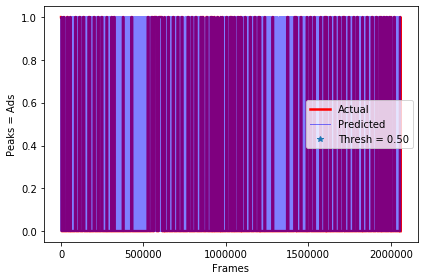

In [17]:
def test():
    thresh = 0.5
    test = pd.read_csv('data/test.csv', usecols=cols)
    X_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1]
    
        # Make predictions using model where Content = 0 and Ads = 1
    with open('%s.pkl'%name, 'rb') as fin:
        pkl_bst = cPickle.load(fin)

    print('\nMaking predictions...\n')
    y_pred = pkl_bst.predict(X_test, num_iteration=pkl_bst.best_iteration)
    print('Done!\n')

    # Convert probabilites to absolute values
    pred_probs=y_pred.copy()
    for i in range(len(y_pred)):
        if y_pred[i]>=thresh:
           y_pred[i]=1
        else:  
           y_pred[i]=0

    eval_metrics(y_test,y_pred,pred_probs)
    plot(y_test,y_pred)
    plt.show()

test()